# Survival Analysis: data analysis

In [8]:
from utilities.std_imports import *
import seaborn as sb
figsize(12,6)

![](img/surv_models.png)

### Key concepts:

1. Survival function: $ \large S(t) = P(E >t) = 1 - F(E) = \int_t^{\infty} f(x)dx $
  
2. Hazard function: $ \large h(t) = \frac{f(t)}{S(t)} $  
  
it can be defined as the instantaneous risk that the event of interest happens, within a very narrow time frame.
Suppose T denotes time from surgery for breast cancer until recurrence. Then when a patient who had received surgery visits her physician, she would be more interested in conditional probabilities such as “Given that I haven’t had a recurrence yet, what are my chances of having one in the next year” than in unconditional probabilities

### Load data

In [9]:
df = pd.read_csv('D:/data/csv/Telco-Customer-Churn.csv') 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data preparation

In [10]:
print('\nBefore\n')
print(df.info())

df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

print('\nAfter\n')
print(df.info())


Before

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null  

In [11]:
# Imputation
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True) # median imputation

# Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID') 

### Data analysis

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [11]:
for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print(' ')

Column Name:  gender
Male      3555
Female    3488
Name: gender, dtype: int64
 
Column Name:  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
 
Column Name:  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
 
Column Name:  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
 
Column Name:  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
 
Column Name:  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
 
Column Name:  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
 
Column Name:  OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
 
Column Name:  DeviceProtection
No                     3095
Yes                    2422
No internet service    152

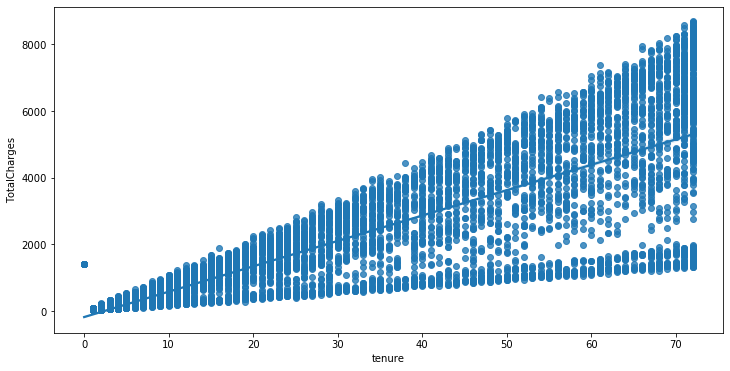

In [14]:
sb.regplot(x="tenure", y="TotalCharges", data=df);

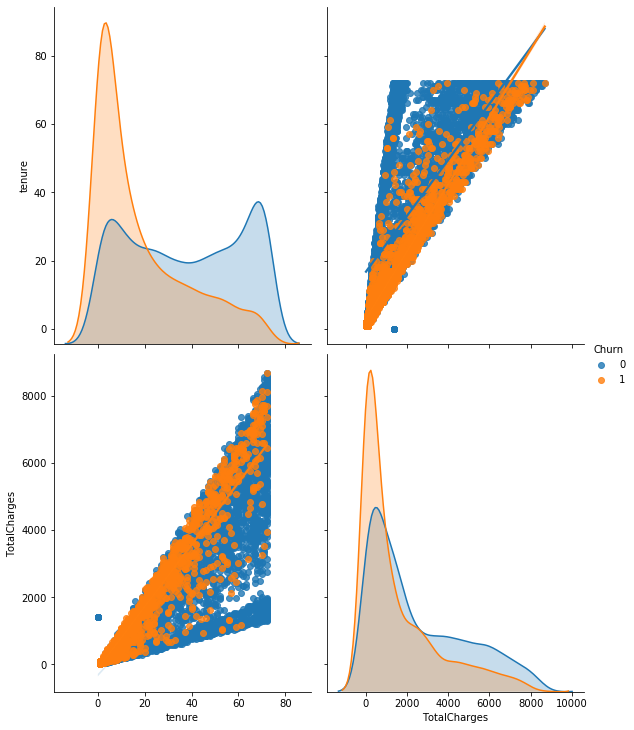

In [26]:
sb.pairplot(df, x_vars=['tenure', 'TotalCharges'], y_vars=['tenure', 'TotalCharges'], hue="Churn", height=5, aspect=.8, kind="reg");

In [28]:
df.to_csv('D:/data/csv/telco_customer-churn_cleansed.csv') 